# Fase 2: Análise Exploratória de Dados (EDA)

O objetivo desta fase é explorar os dados pré-processados para entender as características dos clientes, identificar padrões e formular hipóteses sobre os principais fatores que influenciam o churn. 

Vamos realizar as seguintes análises:
1.  **Análise da Variável Alvo (`Churn`)**: Verificar o balanceamento das classes.
2.  **Churn vs. Features Categóricas**: Analisar a taxa de churn para diferentes categorias de serviços e contratos.
3.  **Churn vs. Features Numéricas**: Comparar a distribuição de variáveis numéricas entre clientes que cancelaram e os que não cancelaram.
4.  **Matriz de Correlação**: Investigar a relação linear entre as principais variáveis numéricas.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar o estilo dos gráficos para melhor visualização
sns.set_theme(style="whitegrid")

### Carregando os Dados

Para a EDA, usaremos o arquivo `telecom_x_cleaned.csv`, pois ele contém as categorias originais, o que facilita a interpretação dos gráficos.

In [2]:
caminho_arquivo_limpo = r'E:\Documentos\Cursos\Alura\ONE\Desafio-03\telecom_x_cleaned.csv'
df = pd.read_csv(caminho_arquivo_limpo)

# Para facilitar cálculos, vamos mapear a coluna Churn para 0 e 1 (a versão original é 'No'/'Yes')
df['Churn_num'] = df['Churn'].map({'No': 0, 'Yes': 1})

display(df.head())

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Churn_num
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,0
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,0
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,1
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,1
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,1


### 1. Análise da Variável Alvo (`Churn`)

C:\Users\Ebenezer Carvalho\AppData\Local\Temp\ipykernel_5432\2954952345.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette='viridis')


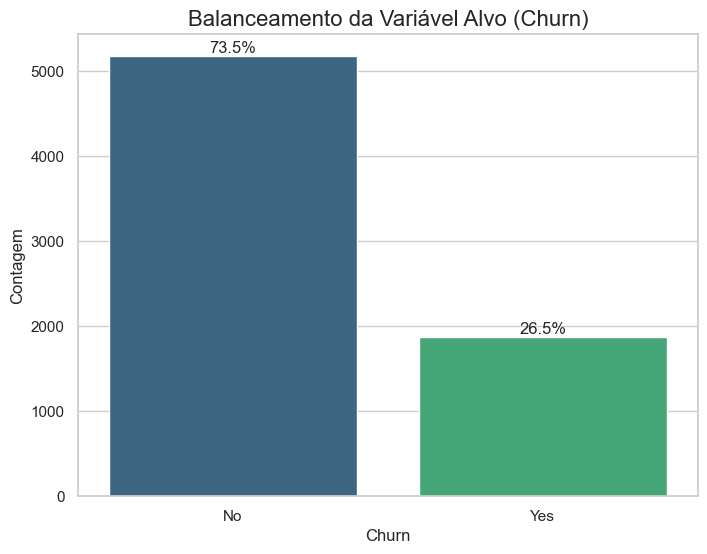

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [3]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Churn', data=df, palette='viridis')

total = len(df['Churn'])
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title('Balanceamento da Variável Alvo (Churn)', fontsize=16)
plt.ylabel('Contagem')
plt.xlabel('Churn')
plt.show()

print(df['Churn'].value_counts(normalize=True))

**Conclusão Preliminar:** Como esperado, o dataset é desbalanceado. Aproximadamente 26.5% dos clientes na amostra cancelaram o serviço. Isso deverá ser levado em conta na fase de modelagem.

### 2. Churn vs. Features Categóricas

Analisaremos a taxa de churn para as categorias de `Contract`, `InternetService` e `PaymentMethod`.

C:\Users\Ebenezer Carvalho\AppData\Local\Temp\ipykernel_5432\3033291298.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values * 100, ax=axes[i], palette='viridis')
C:\Users\Ebenezer Carvalho\AppData\Local\Temp\ipykernel_5432\3033291298.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values * 100, ax=axes[i], palette='viridis')
C:\Users\Ebenezer Carvalho\AppData\Local\Temp\ipykernel_5432\3033291298.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index,

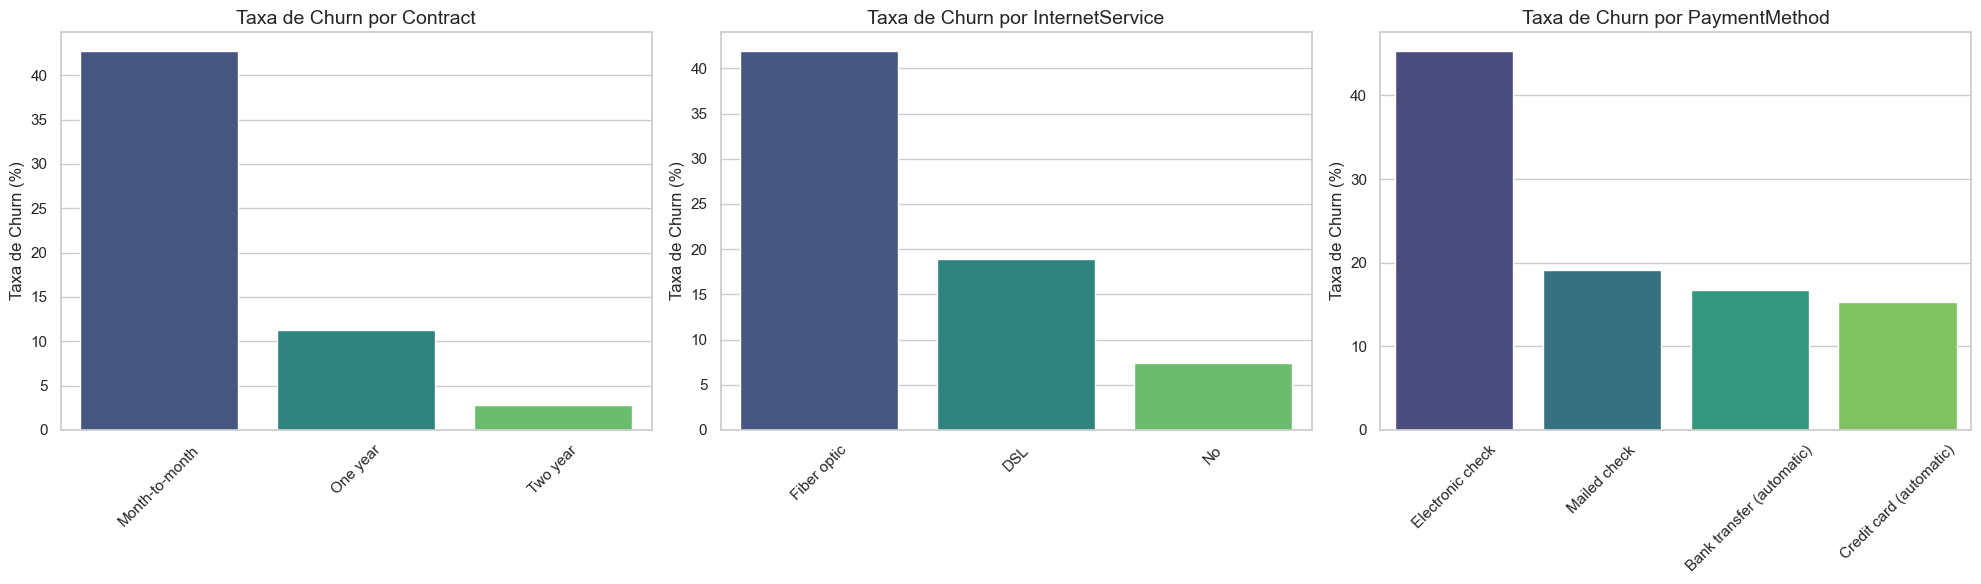

In [4]:
features_categoricas = ['Contract', 'InternetService', 'PaymentMethod']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

for i, feature in enumerate(features_categoricas):
    churn_rate = df.groupby(feature)['Churn_num'].mean().sort_values(ascending=False)
    sns.barplot(x=churn_rate.index, y=churn_rate.values * 100, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Taxa de Churn por {feature}', fontsize=14)
    axes[i].set_ylabel('Taxa de Churn (%)')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Conclusões Preliminares:**
* **Contrato:** Clientes com contrato `Month-to-month` (mensal) têm uma taxa de churn drasticamente maior do que os com contratos de 1 ou 2 anos.
* **Serviço de Internet:** Clientes com `Fiber optic` (fibra óptica) cancelam muito mais do que os com DSL. Curiosamente, a taxa de churn para quem não tem internet é baixíssima.
* **Método de Pagamento:** `Electronic check` (cheque eletrônico) se destaca como o método com a maior taxa de churn.

### 3. Churn vs. Features Numéricas

Vamos visualizar a distribuição de `tenure` e `Charges.Monthly` para ambos os grupos de clientes (Churn 'Yes' e 'No').

C:\Users\Ebenezer Carvalho\AppData\Local\Temp\ipykernel_5432\3558666535.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='tenure', ax=axes[0, 1], palette='viridis')
C:\Users\Ebenezer Carvalho\AppData\Local\Temp\ipykernel_5432\3558666535.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='Charges.Monthly', ax=axes[1, 1], palette='viridis')


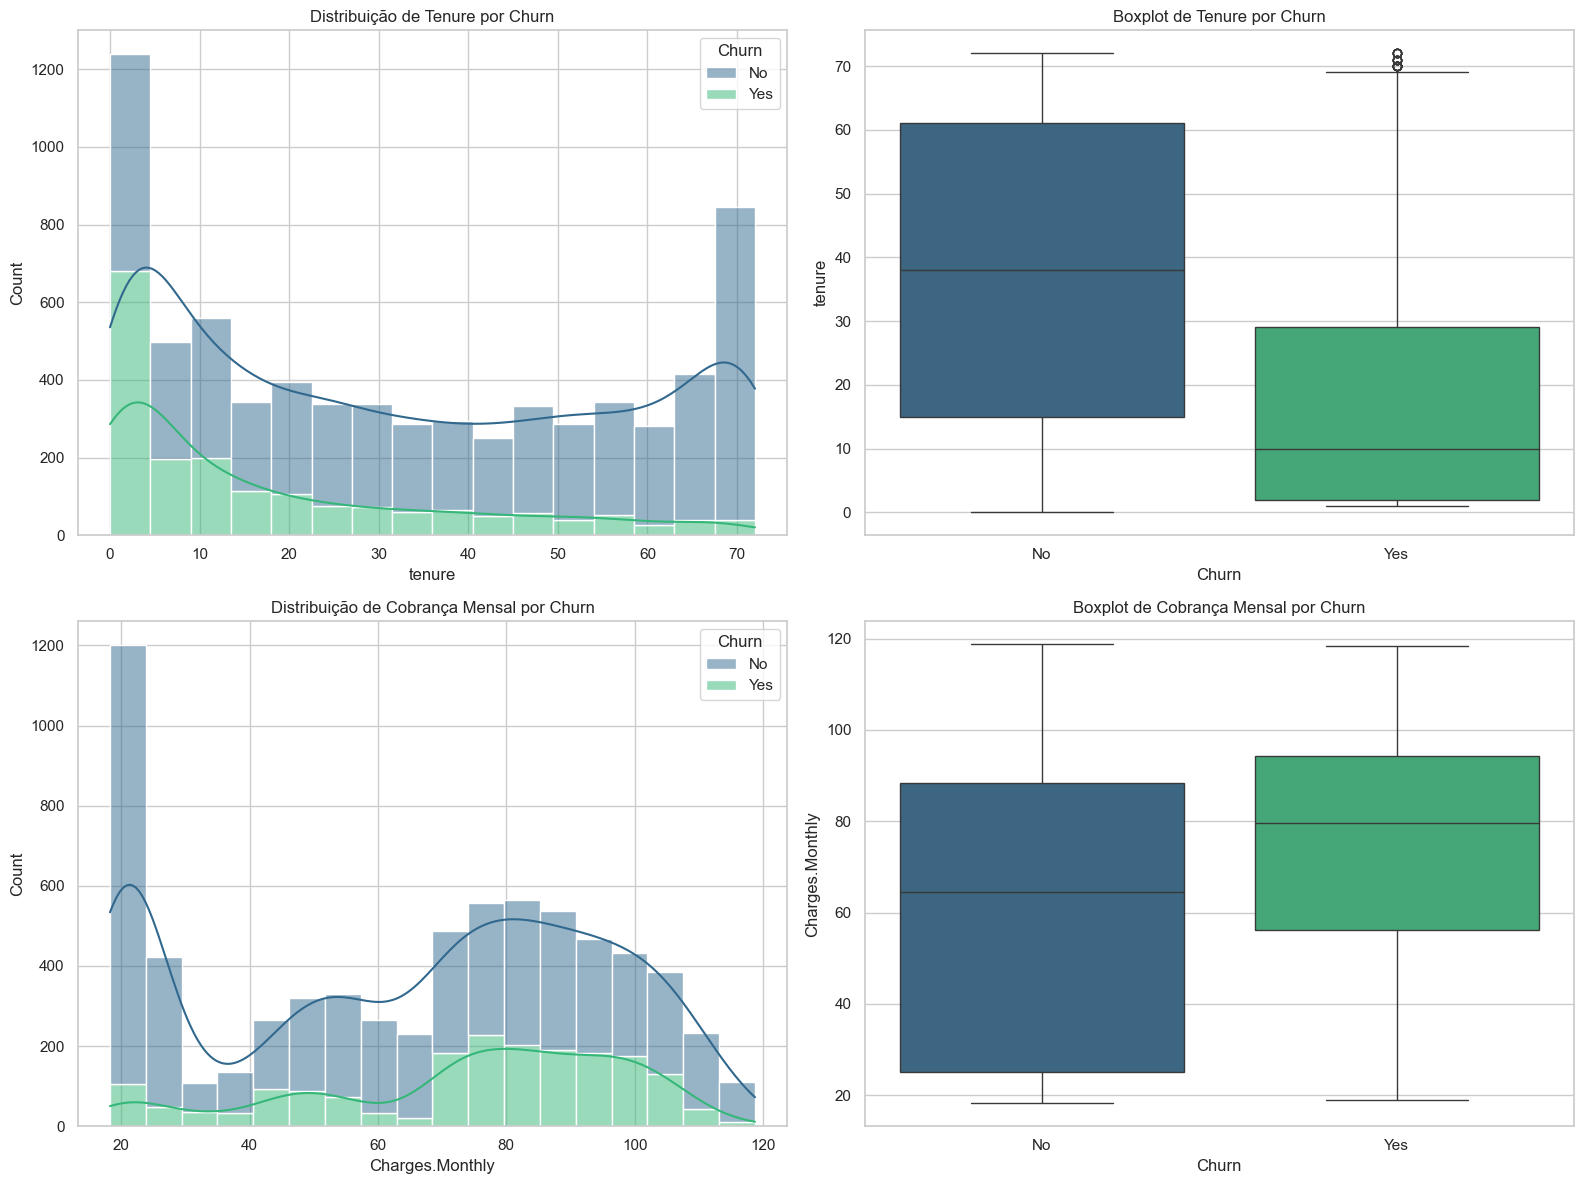

In [5]:
features_numericas = ['tenure', 'Charges.Monthly']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Histograma e Boxplot para Tenure
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', ax=axes[0, 0], palette='viridis', kde=True)
axes[0, 0].set_title('Distribuição de Tenure por Churn')

sns.boxplot(data=df, x='Churn', y='tenure', ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Boxplot de Tenure por Churn')

# Histograma e Boxplot para Charges.Monthly
sns.histplot(data=df, x='Charges.Monthly', hue='Churn', multiple='stack', ax=axes[1, 0], palette='viridis', kde=True)
axes[1, 0].set_title('Distribuição de Cobrança Mensal por Churn')

sns.boxplot(data=df, x='Churn', y='Charges.Monthly', ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Boxplot de Cobrança Mensal por Churn')

plt.tight_layout()
plt.show()

**Conclusões Preliminares:**
* **Tenure (Tempo de Contrato):** O histograma mostra uma grande concentração de churn em clientes com baixo tempo de contrato (clientes novos). O boxplot confirma que a mediana do `tenure` para clientes que cancelam é muito menor.
* **Charges.Monthly (Cobrança Mensal):** Clientes que cancelam tendem a ter uma cobrança mensal mais alta, como mostra a mediana no boxplot. O histograma revela uma concentração de churn na faixa de $70 a $100.

### 4. Matriz de Correlação

Analisamos a correlação linear entre as principais variáveis numéricas do dataset.

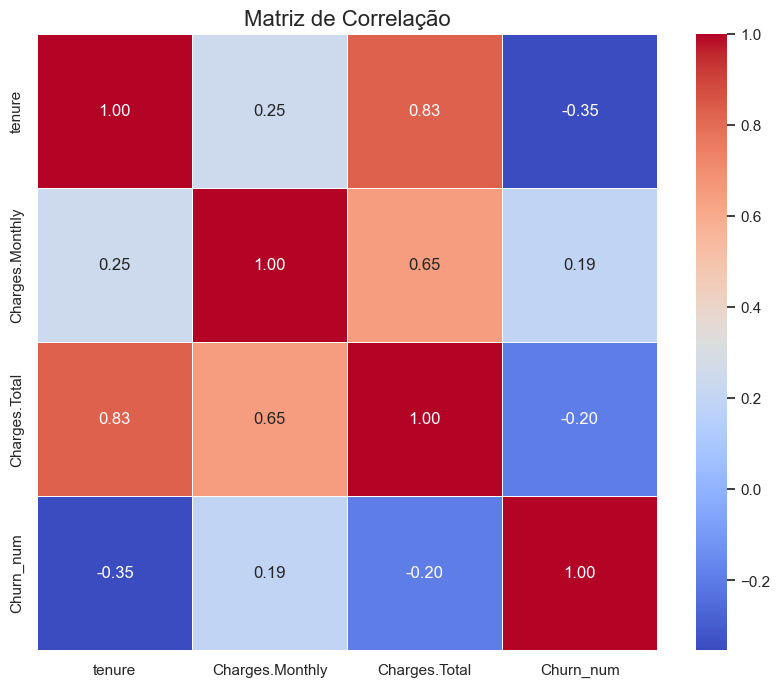

In [6]:
colunas_numericas_corr = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Churn_num']
correlation_matrix = df[colunas_numericas_corr].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlação', fontsize=16)
plt.show()

**Conclusões Preliminares:**
* **Forte Correlação Positiva:** `tenure` e `Charges.Total` (0.83) estão fortemente correlacionadas, o que é esperado, pois quanto mais tempo um cliente permanece, maior o valor total pago.
* **Correlação com Churn:**
    * `tenure` tem uma correlação negativa (-0.35) com o churn, confirmando que clientes mais antigos tendem a cancelar menos.
    * `Charges.Monthly` tem uma correlação positiva (0.19), indicando que cobranças mensais mais altas estão associadas a um maior risco de churn.

In [7]:
# --- Célula para Análise de Estatísticas Descritivas ---

print("="*70)
print(" Análise Comparativa: Estatísticas Descritivas Agrupadas por 'Churn'")
print("="*70)

# Lista das colunas numéricas mais relevantes para a análise
colunas_numericas = ['tenure', 'Charges.Monthly', 'Charges.Total']

# Agrupamos os dados pela variável 'Churn' e calculamos as estatísticas descritivas.
# O método .T (transposto) melhora a legibilidade, colocando os grupos de churn nas colunas.
estatisticas_agrupadas = df.groupby('Churn')[colunas_numericas].describe().round(2).T

# Usar display() para uma formatação de tabela mais amigável no notebook
display(estatisticas_agrupadas)

 Análise Comparativa: Estatísticas Descritivas Agrupadas por 'Churn'


Churn                       No      Yes
tenure          count  5174.00  1869.00
                mean     37.57    17.98
                std      24.11    19.53
                min       0.00     1.00
                25%      15.00     2.00
                50%      38.00    10.00
                75%      61.00    29.00
                max      72.00    72.00
Charges.Monthly count  5174.00  1869.00
                mean     61.27    74.44
                std      31.09    24.67
                min      18.25    18.85
                25%      25.10    56.15
                50%      64.43    79.65
                75%      88.40    94.20
                max     118.75   118.35
Charges.Total   count  5174.00  1869.00
                mean   2549.91  1531.80
                std    2329.95  1890.82
                min       0.00    18.85
                25%     572.90   134.50
                50%    1679.52   703.55
                75%    4262.85  2331.30
                max    8672.45  8684.80